# Assignment A2 [40 marks]

The assignment consists of 3 exercises. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **discussion** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

---
## Question 1: Numerical Differentiation [10 marks]

A general $N$-point finite difference approximation of the derivative $F' \left( x \right)$ of a sufficiently smooth function $F \left( x \right)$ can be written as

$$
F' \left( x \right) \approx \frac{1}{\Delta x} \sum_{i = 1}^N \alpha_i F \left( x + \beta_i \Delta x \right),
\qquad \qquad \qquad (1)
$$

with step size $\Delta x > 0$, and $\alpha_i, \beta_i \in \mathbb{Q}$, with $\beta_i \neq \beta_j$ for $i\neq j$. For example, the centred difference approximation $D_C(x)$ seen in the course has $N = 2$, and

$$
\begin{cases}
\alpha_1 = \frac{1}{2}, &\alpha_2 = -\frac{1}{2}, \\
\beta_1 = 1, &\beta_2 = -1,
\end{cases}
\qquad
\text{giving} \quad
F'(x) \approx \frac{1}{2\Delta x} \left(F\left(x + \Delta x\right) - F\left(x - \Delta x\right)\right).
$$

**1.1** Consider another finite difference approximation defined as in $(1)$, this time with $N=3$, and

$$
\begin{cases}
\alpha_1 = -\frac{4}{23}, &\alpha_2 = -\frac{9}{17}, &\alpha_3 = \frac{275}{391} \\
\beta_1 = -\frac{3}{2}, &\beta_2 = -\frac{1}{3}, &\beta_2 = \frac{4}{5}
\end{cases}.
$$

Investigate the accuracy of this approximation.

**[5 marks]**

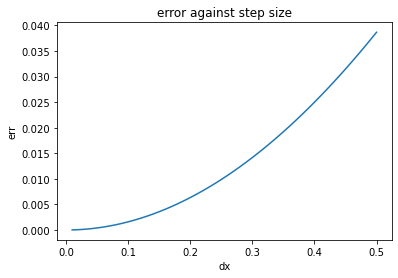

[3.9990203  2.24941267 1.77728509 1.56204181 1.43955455 1.36066816
 1.30567638 1.2651724  1.23410656 1.20952838 1.18959966 1.17311595
 1.15925537 1.14743797 1.13724292 1.12835745 1.12054427 1.11362013
 1.10744128 1.10189332 1.09688416 1.09233876 1.0881954  1.08440286
 1.08091825 1.07770539 1.07473357 1.07197651 1.06941165 1.06701946
 1.06478297 1.06268738 1.06071968 1.05886844 1.05712354 1.055476
 1.05391782 1.05244187 1.05104173 1.04971166 1.04844647 1.04724147
 1.04609242 1.04499546 1.04394708 1.04294408 1.04198354 1.04106277
 1.04017933]
The error and the step size seem to have a squared relatipnship. When the step size is doubled, the error is roughly multiplied by 4. This suggests that the approximation is second order accurate.


In [48]:
import numpy as np
import matplotlib.pyplot as plt

def finitedif(F, x, dx):
    
    a = [-4/23, -9/17, 275/391]
    b = [-3/2, -1/3, 4/5]

# Defining differential of F(x) as dF
    dF = 0

# Finite approximation for N = 3
    for i in range(0,3):
        dF += (1/dx)*a[i]*F(x+b[i]*dx)
    return dF

# example of a smooth function to test accuracy
def f(x):
    return np.sin(x)
x = 3

error = []
dx = []

#calculates value of F'(x) for different step sizes and compares the to exact value to find error
for i in range(1,51):
    error.append(abs(finitedif(f,x,0.01*i)-np.cos(x)))
    dx.append(0.01*i)

error_1 = np.array(error)

# Plots a graph of error against step size to observe relationship and find accuracy order.
plt.plot(dx,error)
plt.title('error against step size')
plt.xlabel("dx")
plt.ylabel("err")
    
plt.show()  
# Looking at the ratios between successive values of the error.
print(error_1[1:] / error_1[:-1])
print('The error and the step size seem to have a squared relatipnship. When the step size is doubled, the error is roughly multiplied by 4. This suggests that the approximation is second order accurate.')

**1.2** For an arbitrary choice of $\beta_i$ values, what is the minimum number of points $N_{p}$ required to find an approximation $(1)$ which is at least $p$th order accurate?

*Hint:* consider the Taylor expansion of $F \left( x + \beta_i \Delta x \right)$ around $x$.

**[3 marks]**

***📝 Discussion for question 1.2




**1.3** Using your reasoning from **1.2**, write a function `FD_coefficients()` which, given $N_p$ values $\beta_i$, returns $N_p$ coefficients $\alpha_i$ such that the approximation $(1)$ is at least $p$th order accurate.

Use your function to obtain the coefficients $\alpha_i$ from **1.1**.

**[2 marks]**

---
## Question 2: Root Finding [10 marks]

Consider the following polynomial of cubic order,

$$
p(z) = z^3 + (c-1)z - c,
$$
where $c \in \mathbb{C}$.

This polynomial is complex differentiable, and we can apply Newton's method to find a complex root $z_\ast$, using a complex initial guess $z_0 = a_0 + ib_0$. In this problem, we seek to map the values of $z_0$ which lead to convergence to a root of $p$.

**2.1** Write a function `complex_newton(amin, amax, bmin, bmax, c, N, eps, target_roots)` which implements Newton's method to find roots of $p(z)$ using $N^2$ initial guesses $z_0 = a_0 + ib_0$. The input arguments are as follows:

- The real part $a_0$ of the initial guess should take `N` linearly spaced values between `amin` and `amax` (inclusive).
- The imaginary part $b_0$ of the initial guess should take `N` linearly spaced values between `bmin` and `bmax` (inclusive).
- `c` is the parameter $c \in \mathbb{C}$ in $p(z)$.
- `eps` is the tolerance $\varepsilon > 0$.
- `target_root` takes one of the following values:
    - if `target_root` is given as `None`, then convergence should be considered as achieved if Newton's method has converged to any root of $p$.
    - if `target_root` is given as a number, then convergence should only be considered as achieved if Newton's method has converged to the specific root $z_\ast =$ `target_root`.

Your function should return an array `kmax` of size $N \times N$, containing the total number of iterations required for convergence, for each value of $z_0$. You should decide what to do in case a particular value of $z_0$ doesn't lead to convergence.
    
Up to 2 marks will be given to solutions which iterate over each value of $z_0$. To obtain up to the full 4 marks, your implementation should be vectorised -- i.e. use a single loop to iterate Newton's method for all values of $z_0$ at once.

**[4 marks]**

In [43]:
import numpy as np

    
def complex_newton(amin, amax, bmin, bmax, c, N, eps, target_root):
    
# Defining the polynomial as a function
    def p(x):
        return x**3 + (c-1)*x - c
    
    z = np.zeros((N,N),dtype=complex)
    
    for i in range(0,N):
        for j in range(0,N):
            
# creating an array of complex numbers equally spaced apart
            z[j][i] = complex(amin+i*(amax-amin)/(N-1), bmin+j*(bmax-bmin)/(N-1))
         
# Array to contain number of iterations.
    kmax = np.zeros((N,N))
    
    zn = z
    
    for n in range(0,100):
        
        for o in range(0,N):
            for q in range(0,N):
                
# Checking if p(z) is below the tolerance.
                if abs(p(zn[o][q])) < eps:
                    
# Does not matter which root if 'None'.
                    if target_root == None:
                        kmax[o][q] = n
                        
                    elif abs(zn[o][q]-target_root) < eps:
                        kmax[o][q] = n
                    
# If it converges to the wrong root it returns 0
                    else:
                        kmax[o][q] = 0
                        
# Applies Newton's method across the array zn.
        zn = zn - p(zn)/(3*zn**2+c-1)
        
    
    return kmax
    
    

**2.2** For $c = 0$, $a_0 \in [-5,5]$ and $b_0 \in [-5,5]$, with at least $N = 200$ values for each (you can increase $N$ if your computer allows it), use your function `complex_newton()` to calculate, for each $z_0 = a_0 + ib_0$, the total number of iterates needed to reach a disk of radius $\varepsilon$ around the root at $z = 1$. Present your results in a heatmap plot, with $a_0$ on the abscissa, $b_0$ on the ordinate and a colour map showing the total number of iterates. 

**[3 marks]**

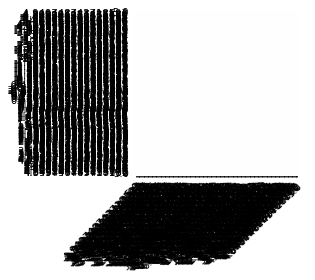

In [44]:
import matplotlib.pyplot as plt

a = []
b = []

# Creates lists a and b of equally spaced numbers from [-5,5]
for i in range(0,200):
    a.append(-5+i*(10)/(199))
    b.append(-5+i*(10)/(199))
    
# An array of iterations corresponding to each complex number z.
iterations = complex_newton(-5, 5, -5, 5, 0, 200, 0.01, 1)

# Creating a heatmap plot of iterations and lists a and b.
fig, ax = plt.subplots()
im = ax.imshow(iterations)

ax.set_xticks(np.arange(len(a)))
ax.set_yticks(np.arange(len(b)))
ax.set_xticklabels(a)
ax.set_yticklabels(b)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(b)):
    for j in range(len(a)):
        text = ax.text(j, i, iterations[i, j],
                       ha="center", va="center", color="w")
        
fig.tight_layout()
plt.show()


**2.3** For $c = 0.32 + 1.64i$, map out the points $z_0$ for which Newton's method does not converge to any root. What does it do instead?

*Hint:* Pick a point $z_0$ in a region where Newton's method does not converge and print out, say, 50 iterates. What do you observe?

**[3 marks]**

***📝 Discussion for question 2.3***

---
## Question 3: Numerical Integration of an ODE [20 marks]

Cardiac tissue is an example of an excitable medium, where a small stimulus can lead to a large response (a heart beat). The FitzHugh-Nagumo model describes the electrical activity of a single cardiac cell in terms of the transmembrane potential $u$ and a recovery variable $v$

\begin{align}
        \dot u & = f(u,v) = \frac{1}{\varepsilon} \left( u - \frac{u^3}{3} - v + I \right) \ , \\
        \dot v & = g(u,v) = \varepsilon \left( u - \gamma v + \beta \right) \ ,
\end{align}

where $I$ (a stimulus), $\varepsilon$, $\gamma$, and $\beta$ are known parameters.

The equation for $u$ leads to fast dynamics with the possibility of excitation, while the linear term proportional to $-v$ in the equation for the recovery variable produces slower dynamics and negative feedback. The FitzHugh-Nagumo model is an example of a stiff differential equation, where the stiffness becomes more pronounced for smaller $\varepsilon$.

In questions **3.1**, **3.2**, and **3.3**, we take $\varepsilon = 0.2$, $\gamma = 0.8$, and $\beta = 0.7$.


**3.1** The fixed points, defined by $\dot u = f(u, v) = 0$ and $\dot v = g(u, v) = 0$, correspond to the state of a cell at rest. Write a function `resting_state()` to determine the values $(u_I^*, v_I^*)$ for the cell in its resting state for a given value of $I$ and a given initial guess $(u_{I, 0}, v_{I, 0})$, using Newton's method.

Use your function to compute $(u_I^*, v_I^*)$ for $I=0$ and $I = 0.5$, with initial guess $(u_{I, 0}, v_{I, 0}) = (0.2, 0.2)$.


**[5 marks]**

In [22]:


import numpy as np

def resting_state(I, u0, v0, gamma):

# Defining the functions F and G
    def F(u, v):
        return 5*(u-(u**3)/3-v+I)
    
    def G(u, v):
        return 0.2*(u-gamma*v+0.7)

# Creating a function for the Jacobian matrix of u and v.
    def Jac(u, v):
        J = np.zeros([2,2])
        J[0,0] = 5 - 5*u**2
        J[0,1] = -5
        J[1,0] = 1/5
        J[1,1] = -gamma/5
        return J
    
    def FG(u,v):
        return np.array([F(u, v), G(u, v)])
        
    x = np.array([u0, v0])
    
# Keeps the loop going for as long as the norm of the array FG is greater than the tolerance.
    while np.linalg.norm(FG(x[0], x[1])) >= 1e-12:
        
# Newton iteration
        e = -np.linalg.solve(Jac(x[0], x[1]), FG(x[0], x[1]))
        x += e
                
    return x

print('The values of u and v at resting state when I = 0 is'+' '+ str(resting_state(0, 0.2, 0.2, 0.8)))
print('The values of u and v at resting state when I = 0.5 is'+' '+ str(resting_state(0.5, 0.2, 0.2, 0.8)))


The values of u and v at resting state when I = 0 is [-1.19940804 -0.62426004]
The values of u and v at resting state when I = 0.5 is [-0.80484775 -0.13105968]


**3.2** Using the method of your choice **\***, compute the numerical solution $(u_n, v_n) \approx (u(n\Delta t), v(n\Delta t)), n=0, 1, 2, \dots$ for the FitzHugh-Nagumo model.

You should compute the solution for both $I = 0$ and $I = 0.5$, starting at time $t = 0$ until at least $t = 100$, with $(u_0 = 0.8, v_0 = 0.8)$ as the initial condition.

Present your results graphically by plotting

(a) $u_n$ and $v_n$ with **time** (not time step) on the x-axis,  
(b) $v_n$ as a function of $u_n$. This will show what we call the solution trajectories in *phase space*.

You should format the plots so that the data presentation is clear and easy to understand.

Given what this mathematical model describes, and given that $I$ represents a stimulus, how do you interpret your results for the two different values of $I$? Describe your observations in less than 200 words.


**\*** You may use e.g. the forward Euler method seen in Week 7 with a small enough time step, or use one of the functions provided by the `scipy.integrate` module, as seen in Quiz Q4.


**[7 marks]**

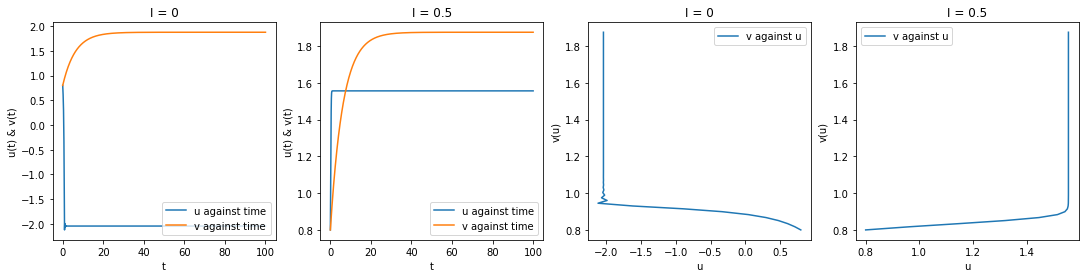

In [28]:
import matplotlib.pyplot as plt

# Defines functions F and G
def F(u, v, I):
    return 5*(u-(u**3)/3-v+I)

def G(u, v, gamma):
    return 0.2*(u-gamma*v+0.7)

# list of equally spaced values of t 
t = np.linspace(0, 100, 1001)
dt = 100 / (1001-1)

# creating two arrays for u for when I = 0 and I = 0.5.
u0 = np.zeros(1001)
u0[0] = 0.8
u = np.zeros(1001)
u[0] = 0.8

# Executes the Euler method for u and v.
for i in range(0,1000):
    u0[i + 1] = F(u0[i], 0.8, 0) * dt + u0[i]
    u[i + 1] = F(u[i], 0.8, 0.5) * dt + u[i]
    
v = np.zeros(1001)
v[0] = 0.8
    
for i in range(0,1000):
    v[i + 1] = G(0.8, v[i], 0.8) * dt + v[i]
    
# Creating plots for u and v against t at I=0 and I=0.5.
plt.subplot(1, 4, 1)
plt.plot(t,u0,label="u against time")
plt.plot(t,v,label = "v against time")
plt.title('I = 0')
plt.xlabel("t")
plt.ylabel("u(t) & v(t)")    
plt.legend(loc="lower right")

plt.subplot(1, 4, 2)
plt.plot(t,u,label="u against time")
plt.plot(t,v,label = "v against time")
plt.title('I = 0.5')
plt.xlabel("t")
plt.ylabel("u(t) & v(t)")    
plt.legend(loc="lower right")

# Creating plots for v against u at I=0 and I=0.5.
plt.subplot(1, 4, 3)
plt.plot(u0,v,label="v against u")
plt.title('I = 0')
plt.xlabel("u")
plt.ylabel("v(u)")    
plt.legend(loc="upper right")

plt.subplot(1, 4, 4)
plt.plot(u,v,label="v against u")
plt.title('I = 0.5')
plt.xlabel("u")
plt.ylabel("v(u)")    
plt.legend(loc="upper left")

plt.subplots_adjust(right = 2.5)
plt.show()

***📝 Discussion for question 3.2***

The variable v is not affected by I, which is why both graphs of v against t are the same. v increases very quickly and then plateaus to a fixed value after about 20 seconds. As v represents the recovery variable, this shows that after the cardic cell is excited it recovers very quickly. Without stimulus I, the variable u drops almost instantly to -2 and stays there. This shows that without a stimulus there is almost no response in the cell, compared to when I = 0.5 and u increases almost instantly to about 15, which shows that even a small increased stimulus immediately increases the potential. This is shown again in v against u, as when I = 0 the graph has a general negative correlation, whereas with the stimulus at I = 0.5 u increases as v increases.

**3.3** Compute the eigenvalues of the Jacobi matrix
        
$$
\large
\begin{pmatrix}
    \frac{\partial f}{\partial u} & \frac{\partial f}{\partial v} \\ 
    \frac{\partial g}{\partial u} & \frac{\partial g}{\partial v}
\end{pmatrix}_{u = u_I^*, v = v_I^*}
$$

evaluated at the fixed points $u = u_I^*, v = v_I^*$, for $I = 0$ and $I = 0.5$. What do you observe?

*You may use NumPy built-in functions to compute eigenvalues.*


**[3 marks]**

In [24]:
rs0 = resting_state(0, 0.2, 0.2, 0.8)
rs05 = resting_state(0.5, 0.2, 0.2, 0.8)

# Function for the Jacobi matrix
def Jac(u):
    J = np.zeros([2,2])
    J[0,0] = 5 - 5*u**2
    J[0,1] = -5
    J[1,0] = 1/5
    J[1,1] = -4/25
    return J

# Jacobi matrices at I=0 and I=0.5.
J0 = Jac(rs0[0])
J05 = Jac(rs05[0])

# Built in NumPy function to calculate the eigenvalues.
print('eigenvalues for I = 0 are' +' ' +str(np.linalg.eigvals(J0)))
print('eigenvalues for I = 0.5 are' +' ' +str(np.linalg.eigvals(J05)))

eigenvalues for I = 0 are [-1.35857198 -0.9943262 ]
eigenvalues for I = 0.5 are [0.80055026+0.27810645j 0.80055026-0.27810645j]


***📝 Discussion for question 3.3***

When the stimulus I is zero the eigenvalues are both negative real numbers, but when the stimulus is added at I = 0.5, both eigenvalues become complex numbers, one in the positive real and imaginary quadrant, one in the positive real and negative imaginary quadrant.

**3.4** For this question, we set $I = 0$ and $\gamma = 5$.

(a) Use the function `resting_state()` you wrote for **3.1** to find three fixed points, $(u_{(0)}^*, v_{(0)}^*)$, $(u_{(1)}^*, v_{(1)}^*)$ and $(u_{(2)}^*, v_{(2)}^*)$, using the initial conditions provided in the NumPy array `uv0` below (each row of the array constitutes a pair of initial conditions for one of the three fixed points).

(b) Compute the numerical solution $(u_n, v_n), n=0, 1, 2, \dots$ using the initial condition $(u_{(0)}^* + \delta, v_{(0)}^* + \delta)$, for $\delta \in \{0, 0.3, 0.6, 1.0\}$. This simulates the activity of a cell starting at a small perturbation $\delta$ of one of its resting states, in this case $(u_{(0)}^*, v_{(0)}^*)$.

Plot your results in a similar way as in question **3.2**, and discuss your observations in less than 150 words. In particular, does the solution always return to the same fixed point, i.e. the same resting state?

**[5 marks]**

(a)
[array([-1.63022488, -0.18604498]), array([0.17732319, 0.17546464]), array([-1.63022488, -0.18604498])]
(b)


<function matplotlib.pyplot.show(*args, **kw)>

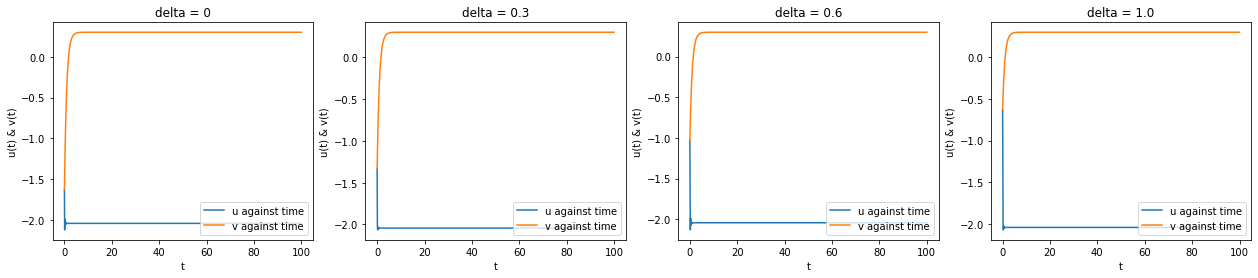

In [36]:
import numpy as np

# Initial conditions
uv0 = np.array([[0.83928724, 0.64551717],
                [0.03831243, 0.43144263],
                [-1.7232432, -0.2604498]])

uv = []
# using function from 3.1 to find the three fixed points.
for x in uv0:
    uv.append(resting_state(0, x[0], x[1], 5))
    
print('(a)')
print(uv)
    
print('(b)')
#List of time points equally spaced apart.
t = np.linspace(0, 100, 1001)
# Time interval.
dt = 100 / (1001-1)

# list for each value of delta.
d = [0,0.3,0.6,1.0]
for j in range(0,4):
    
    u = np.zeros(1001)
# Calculating initial condition u using different deltas. 
    u[0] = uv[0][0] + d[j]

# Implementing the Euler method like in 3.2
    for i in range(0,1000):
        u[i + 1] = F(u[i], 0.8, 0) * dt + u[i]

# Same for v.
    v = np.zeros(1001)
    v[0] = uv[0][0] + d[j]
    
    for i in range(0,1000):
        v[i + 1] = G(0.8, v[i], 5) * dt + v[i]
    
# Plotting graphs for each value of delta.
    plt.subplot(1,4,j+1)
    plt.plot(t,u,label="u against time")
    plt.plot(t,v,label = "v against time")
    plt.title('delta = '+str(d[j]))
    plt.xlabel("t")
    plt.ylabel("u(t) & v(t)")    
    plt.legend(loc="lower right")
    
plt.subplots_adjust(right = 2.9)
plt.show

***📝 Discussion for question 3.4***

The initial values for u and v are different in each graph, as they were directly dependent on the value of delta. Apart from that the graphs are all almost identical, with both u and v returning quickly to their resting values, u at about -2.0, and v at about 0.5. This could be because for this question, we set I to be zero which means there is no stimulus. The variables will therefore return to their resting state quickly, whatever their initial values are.